<a href="https://colab.research.google.com/github/leo-h2/h2care-station/blob/main/station_model_total_rev0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os

if os.path.isfile('data_set/total_congress.csv') == True:
  print('already')
else:
  os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/leo-h2/h2care-station/main/data_set/total_congress.csv

% cd /content





/content/data_set
--2020-12-03 13:59:46--  https://raw.githubusercontent.com/leo-h2/h2care-station/main/data_set/total_congress.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446555 (436K) [text/plain]
Saving to: ‘total_congress.csv’

total_congress.csv  100%[===================>] 436.09K  --.-KB/s    in 0.04s   

2020-12-03 13:59:46 (10.0 MB/s) - ‘total_congress.csv’ saved [446555/446555]

/content


In [3]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = DATA_PATH + '/total_congress.csv'



In [4]:
df_raw_data = pd.read_csv(RAW_PATH)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6117 non-null   int64  
 1   station_name        6117 non-null   int64  
 2   time                6117 non-null   object 
 3   holiday             6117 non-null   bool   
 4   day_week            6117 non-null   object 
 5   weekend             6117 non-null   bool   
 6   temperature         6109 non-null   float64
 7   humid               6109 non-null   float64
 8   precipitation       6109 non-null   float64
 9   precipitation_type  6109 non-null   float64
 10  year                6117 non-null   int64  
 11  month               6117 non-null   int64  
 12  day                 6117 non-null   int64  
 13  hour                6117 non-null   int64  
 14  minute              6117 non-null   int64  
 15  total_car_num       6117 non-null   int64  
dtypes: boo

Unnamed: 0            0
station_name          0
time                  0
holiday               0
day_week              0
weekend               0
temperature           8
humid                 8
precipitation         8
precipitation_type    8
year                  0
month                 0
day                   0
hour                  0
minute                0
total_car_num         0
dtype: int64

In [5]:
df_raw_data.dropna(axis = 0, inplace= True)
df_raw_data.info()

df_raw_data.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data.info()

df_raw_data.drop('time', axis=1, inplace = True)
df_raw_data.info()


df_raw_data['day_week'].replace('mon', 0, inplace = True)
df_raw_data['day_week'].replace('tue', 1, inplace = True)
df_raw_data['day_week'].replace('wen', 2, inplace = True)
df_raw_data['day_week'].replace('thu', 3, inplace = True)
df_raw_data['day_week'].replace('fri', 4, inplace = True)
df_raw_data['day_week'].replace('sat', 5, inplace = True)
df_raw_data['day_week'].replace('sun', 6, inplace = True)

df_raw_data['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data['weekend'] = df_raw_data['weekend'].astype(int)


df_raw_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 6116
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6109 non-null   int64  
 1   station_name        6109 non-null   int64  
 2   time                6109 non-null   object 
 3   holiday             6109 non-null   bool   
 4   day_week            6109 non-null   object 
 5   weekend             6109 non-null   bool   
 6   temperature         6109 non-null   float64
 7   humid               6109 non-null   float64
 8   precipitation       6109 non-null   float64
 9   precipitation_type  6109 non-null   float64
 10  year                6109 non-null   int64  
 11  month               6109 non-null   int64  
 12  day                 6109 non-null   int64  
 13  hour                6109 non-null   int64  
 14  minute              6109 non-null   int64  
 15  total_car_num       6109 non-null   int64  
dtypes: boo

,Unnamed: 0,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


In [6]:
X, y = df_raw_data.iloc[:,2:-1].values, df_raw_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 1.  5.  1. ...  3. 17. 25.]
 [ 0.  2.  0. ...  9. 17. 25.]
 [ 1.  4.  0. ...  2.  8. 45.]
 ...
 [ 0.  2.  0. ... 14.  9.  5.]
 [ 0.  3.  0. ... 15. 11. 35.]
 [ 0.  1.  0. ... 13.  8.  5.]]
X_test : [[ 0.  3.  0. ... 24. 21. 46.]
 [ 1.  4.  0. ...  9. 22.  5.]
 [ 0.  0.  0. ...  5. 15. 15.]
 ...
 [ 0.  2.  0. ... 14. 21. 30.]
 [ 0.  5.  1. ... 10. 18. 50.]
 [ 1.  5.  1. ...  3. 13. 40.]]
y_train : [3 2 3 ... 3 0 0]
y_test : [4 0 3 ... 2 3 1]


In [7]:
def plot_error(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, 
           y_train_pred - y_train,
           c= 'steelblue',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Training data')

    plt.scatter(y_test_pred, 
           y_test_pred - y_test,
           c= 'limegreen',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Test data')

    plt.xlabel('Predicted values')
    plt.ylabel('residuals')
    plt.legend(loc = 'upper left')
    plt.hlines(y =0, xmin = 0, xmax = 5, lw = 2, color = 'black')
    plt.xlim ([0, 5])
    plt.tight_layout()
    plt.show()

In [8]:
def plot_density(y_train, y_test_pred):
    fig,(ax1,ax2)= plt.subplots(ncols=2)
    fig.set_size_inches(12,5)
    sns.distplot(y_train,ax=ax1,bins=10)
    ax1.set(title="train", xlim = ([-1, 6]), ylim = ([0, 0.6]))
    sns.distplot(y_test_pred,ax=ax2,bins=10)
    ax2.set(title="test", xlim = ([-1, 6]), ylim = ([0, 0.6]))

(4886, 12)
(1222, 12)
(4886,)
(1222,)


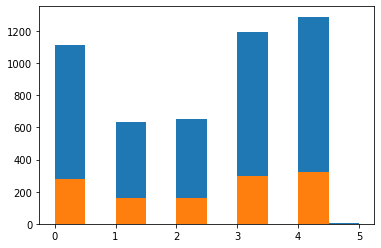

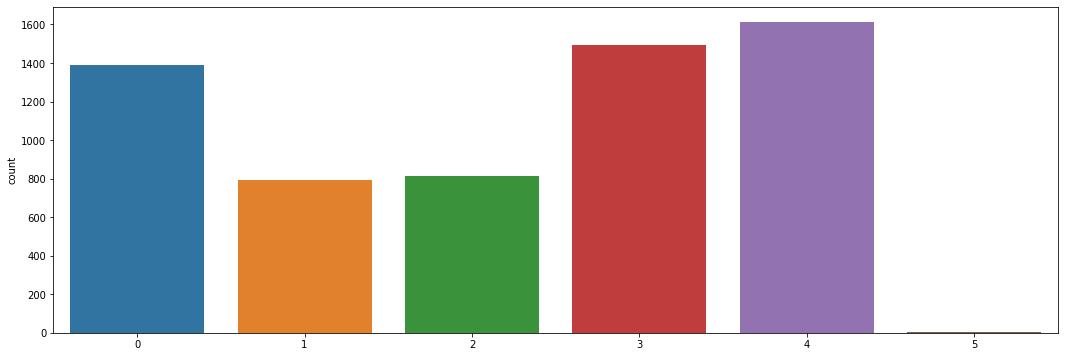

In [9]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)

plt.hist(y_train, bins=10)
plt.hist(y_test, bins=10)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
sns.countplot(x = y, ax = ax1)

모델별 성능 확인을 위한 함수

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def plot_predictions_test(name_, pred, actual):
    plt.figure(figsize=(11, 8))
    index = np.arange(0,len(pred),1)

    plt.scatter(index, y_test, alpha=0.7, marker='o', color='black')
    plt.scatter(index, y_test_pred, alpha=0.7, marker='x', color='r')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()


def plot_predictions_partial_test(name_, pred, actual, start, end):
    plt.figure(figsize=(11, 8))
    index = np.arange(0,len(pred),1)

    plt.scatter(index[start:end], y_test[start:end], alpha=0.7, marker='o', color='black')
    plt.scatter(index[start:end], y_test_pred[start:end], alpha=0.7, marker='x', color='r')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    # data frame actual data abnormal by bumrae 
    # plot_predictions(name_, pred, actual)
    plot_predictions_test(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    # plt.xlim(min_, max_)
    plt.xlim(0, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

단일 회귀예측 모델

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

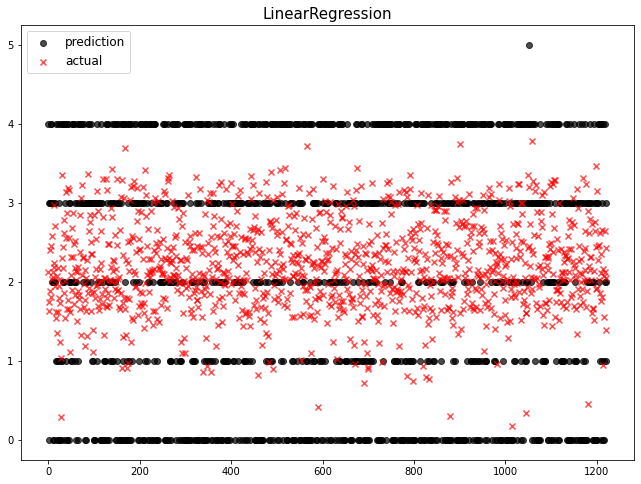

              model       mse
0  LinearRegression  2.117299


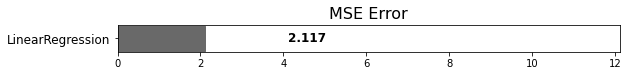

In [93]:
# LInearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_test_pred = linear_reg.predict(X_test)
mse_eval('LinearRegression', y_test_pred, y_test)


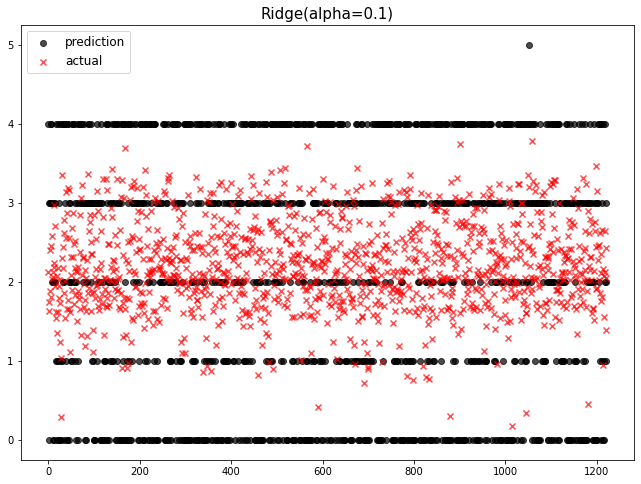

              model       mse
0  LinearRegression  2.117299
1  Ridge(alpha=0.1)  2.117259


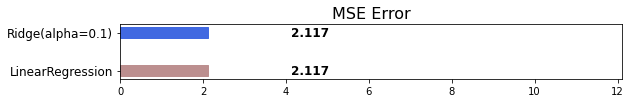

In [94]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)
mse_eval('Ridge(alpha=0.1)', y_test_pred, y_test)

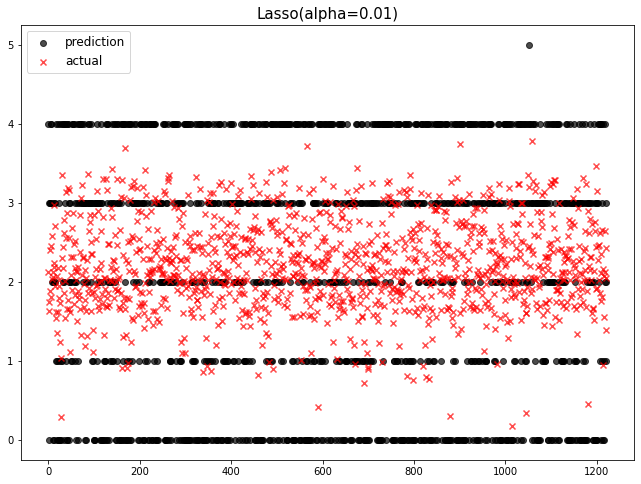

               model       mse
0   LinearRegression  2.117299
1   Ridge(alpha=0.1)  2.117259
2  Lasso(alpha=0.01)  2.104327


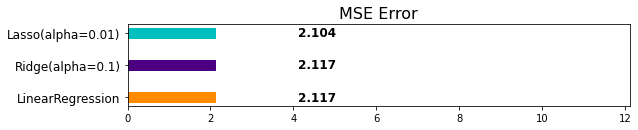

In [95]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_test = lasso.predict(X_test)
mse_eval('Lasso(alpha=0.01)', y_pred_test, y_test)

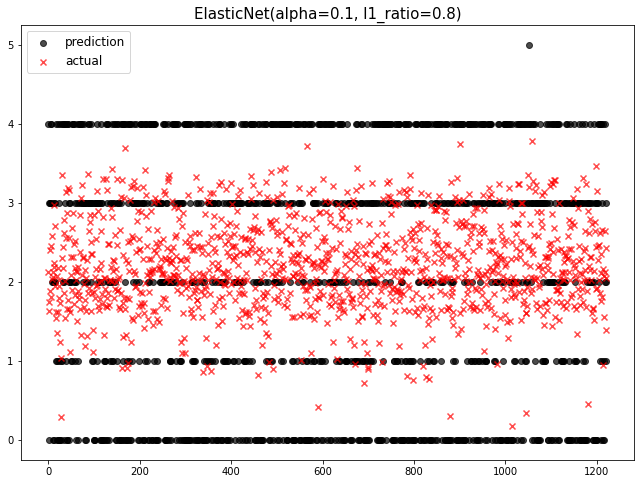

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
3                    Lasso(alpha=0.01)  2.104327


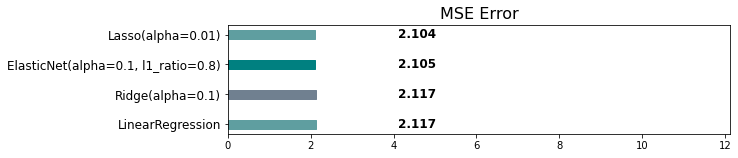

In [96]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.8)
elasticnet.fit(X_train, y_train)
y_pred_test = elasticnet.predict(X_test)
mse_eval('ElasticNet(alpha=0.1, l1_ratio=0.8)', y_pred_test, y_test)  

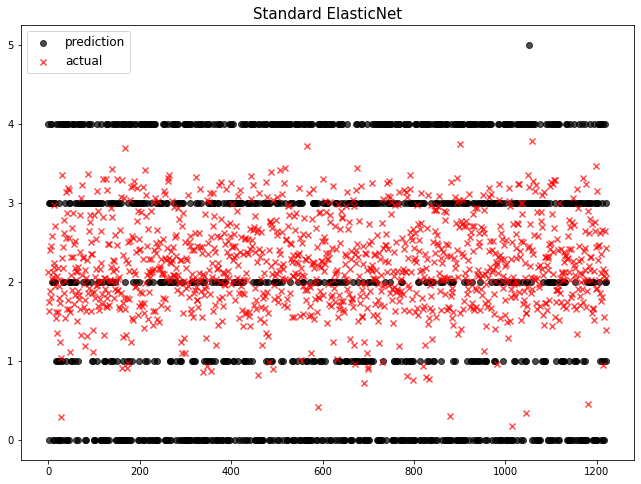

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2                  Standard ElasticNet  2.107776
3  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                    Lasso(alpha=0.01)  2.104327


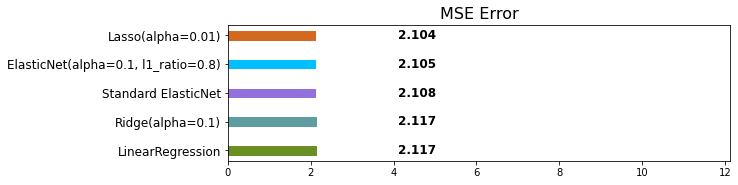

In [97]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.01, l1_ratio=0.8)
)
elasticnet_pipeline.fit(X_train, y_train)
elasticnet_pred = elasticnet_pipeline.predict(X_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3823.0967123791206, tolerance: 1.1307260744985668
  positive)


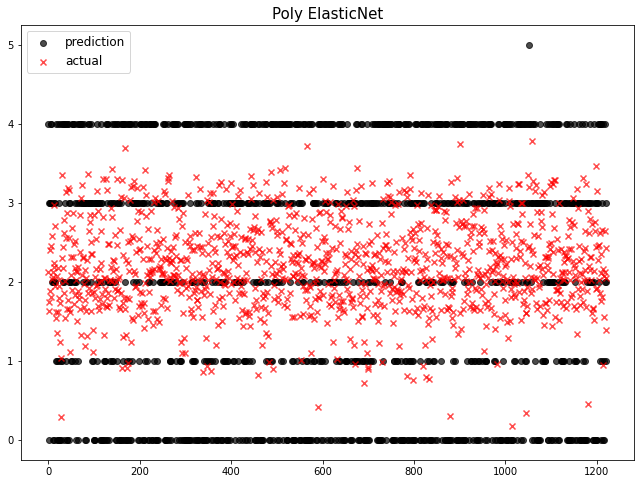

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2                  Standard ElasticNet  2.107776
3  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                    Lasso(alpha=0.01)  2.104327
5                      Poly ElasticNet  1.589153


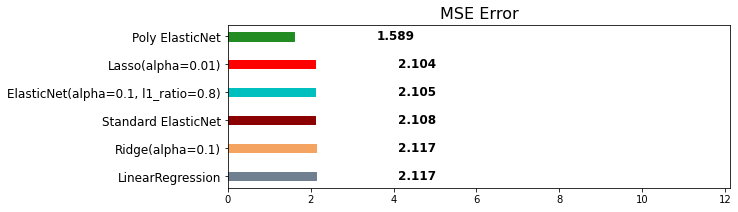

In [98]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pipeline.fit(X_train, y_train)
poly_pred = poly_pipeline.predict(X_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

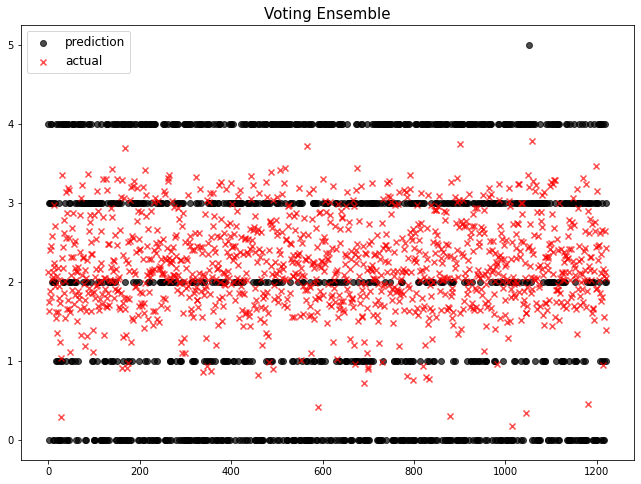

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2                  Standard ElasticNet  2.107776
3  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                    Lasso(alpha=0.01)  2.104327
5                      Voting Ensemble  1.933001
6                      Poly ElasticNet  1.589153


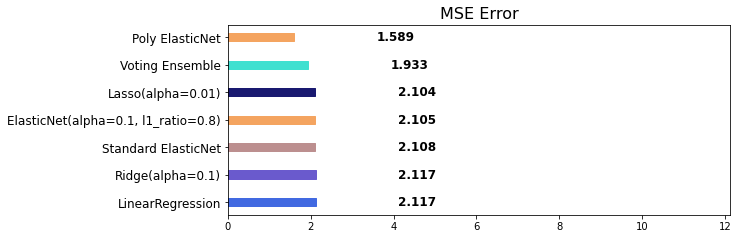

In [101]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet_pipeline', elasticnet_pipeline), 
    ('poly_pipeline', poly_pipeline)
]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)
voting_regressor.fit(X_train, y_train)
voting_pred = voting_regressor.predict(X_test)
mse_eval('Voting Ensemble', voting_pred, y_test)

In [102]:
# 미사용 classifir 임
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression, RidgeClassifier

# models = [
#     ('Logi', LogisticRegression()), 
#     ('ridge', RidgeClassifier())
# ]

# vc = VotingClassifier(models, voting='hard')

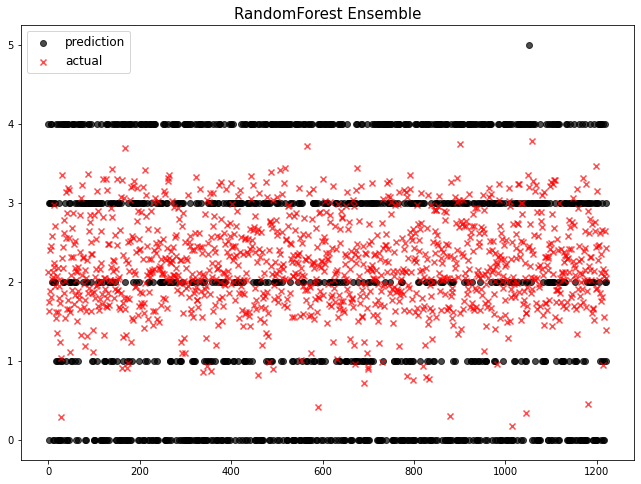

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2                  Standard ElasticNet  2.107776
3  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                    Lasso(alpha=0.01)  2.104327
5                      Voting Ensemble  1.933001
6                      Poly ElasticNet  1.589153
7                RandomForest Ensemble  0.485249


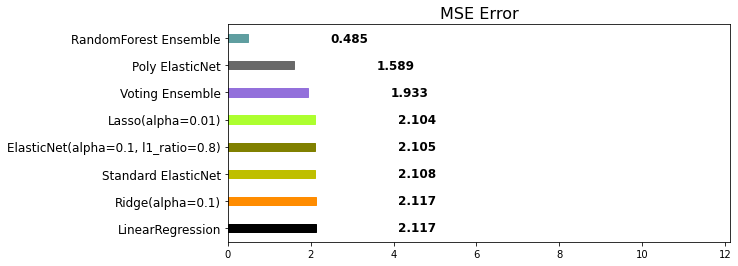

In [104]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!  
n_jobs: CPU 사용 갯수  
max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용  
n_estimators: 앙상블하는 트리의 갯수  
max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용  
min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

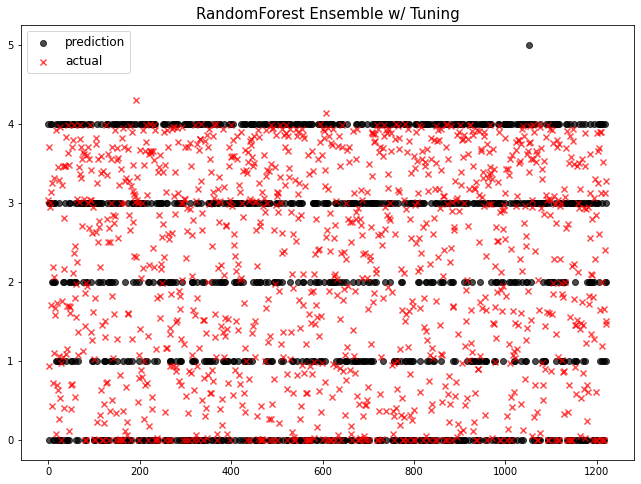

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2                  Standard ElasticNet  2.107776
3  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                    Lasso(alpha=0.01)  2.104327
5                      Voting Ensemble  1.933001
6                      Poly ElasticNet  1.589153
7                RandomForest Ensemble  0.485249
8      RandomForest Ensemble w/ Tuning  0.476526


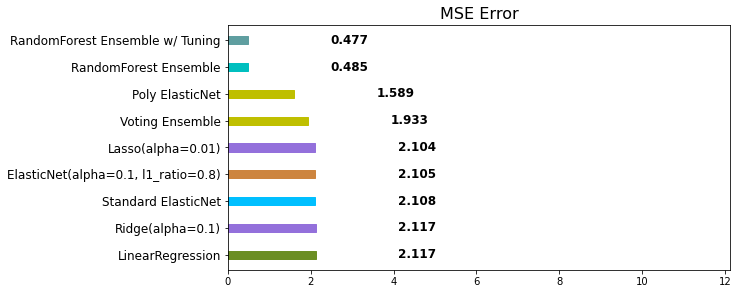

In [109]:
# rfr = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=7, max_features=0.9)

rfr = RandomForestRegressor(random_state=10, n_estimators=1000)

# 이전 하이퍼 파라미터
# model = RandomForestRegressor(n_estimators = 100,
#                               n_jobs = -1,
#                               random_state = 0)

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
mse_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

Boosting

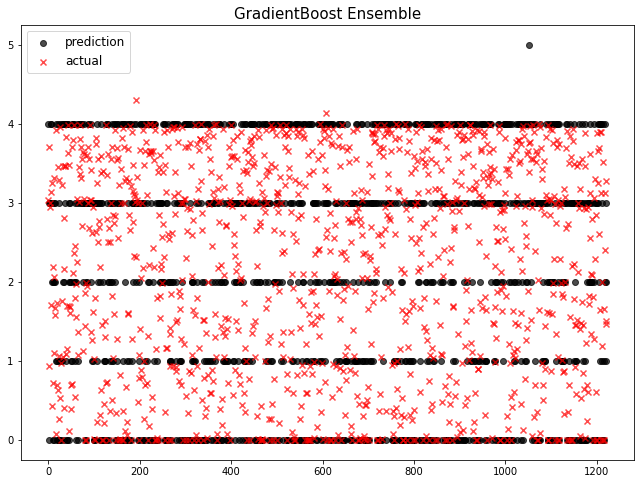

                                 model       mse
0                     LinearRegression  2.117299
1                     Ridge(alpha=0.1)  2.117259
2                  Standard ElasticNet  2.107776
3  ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                    Lasso(alpha=0.01)  2.104327
5                      Voting Ensemble  1.933001
6                      Poly ElasticNet  1.589153
7               GradientBoost Ensemble  1.065796
8                RandomForest Ensemble  0.485249
9      RandomForest Ensemble w/ Tuning  0.476526


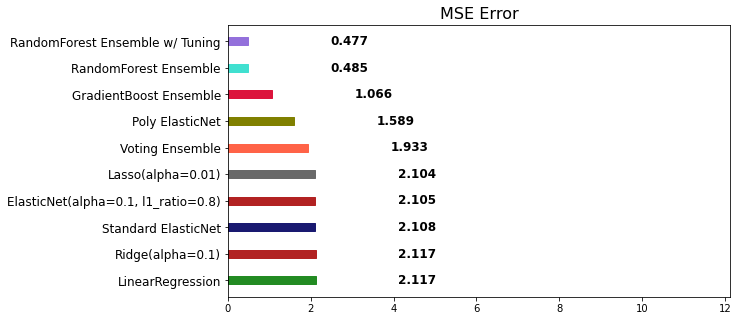

In [112]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# gbr = GradientBoostingRegressor(random_state=42)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!  
n_jobs: CPU 사용 갯수  
learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다.   
적절한 값을 찾아야함. n_estimators와 같이 튜닝.   default=0.1  
n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념)  . default=100  
subsample: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용  
min_samples_split: 노드 분할시 최소 샘플의 갯수. default=2. 과대적합 방지용  

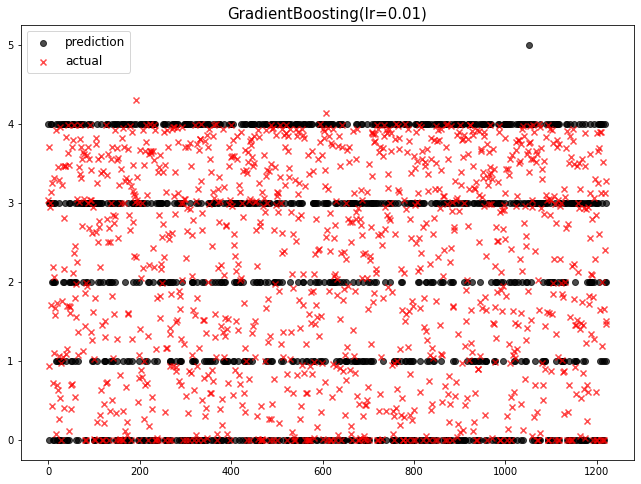

                                  model       mse
0                      LinearRegression  2.117299
1                      Ridge(alpha=0.1)  2.117259
2                   Standard ElasticNet  2.107776
3   ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                     Lasso(alpha=0.01)  2.104327
5                       Voting Ensemble  1.933001
6                       Poly ElasticNet  1.589153
7                GradientBoost Ensemble  1.065796
8             GradientBoosting(lr=0.01)  1.053063
9                 RandomForest Ensemble  0.485249
10      RandomForest Ensemble w/ Tuning  0.476526


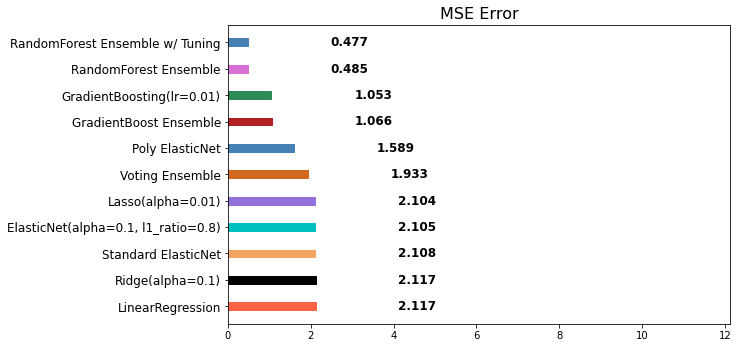

In [117]:
# gbr = GradientBoostingRegressor(random_state=SEED, learning_rate=0.01)
SEED = 30

gbr = GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
mse_eval('GradientBoosting(lr=0.01)', gbr_pred, y_test)



[15:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


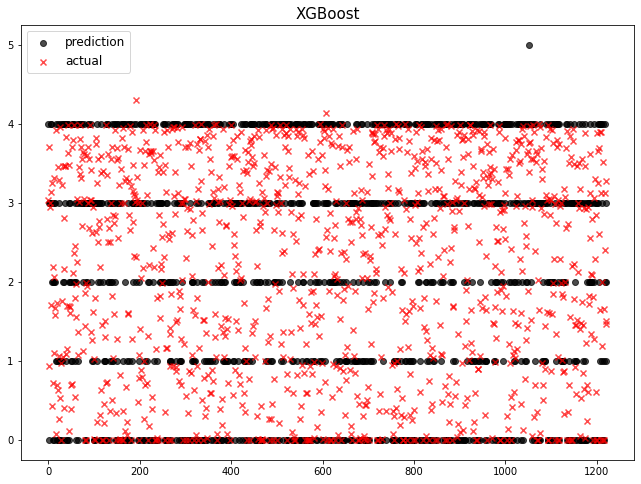

                                  model       mse
0                      LinearRegression  2.117299
1                      Ridge(alpha=0.1)  2.117259
2                   Standard ElasticNet  2.107776
3   ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                     Lasso(alpha=0.01)  2.104327
5                       Voting Ensemble  1.933001
6                       Poly ElasticNet  1.589153
7                               XGBoost  1.066186
8                GradientBoost Ensemble  1.065796
9             GradientBoosting(lr=0.01)  1.053063
10                RandomForest Ensemble  0.485249
11      RandomForest Ensemble w/ Tuning  0.476526


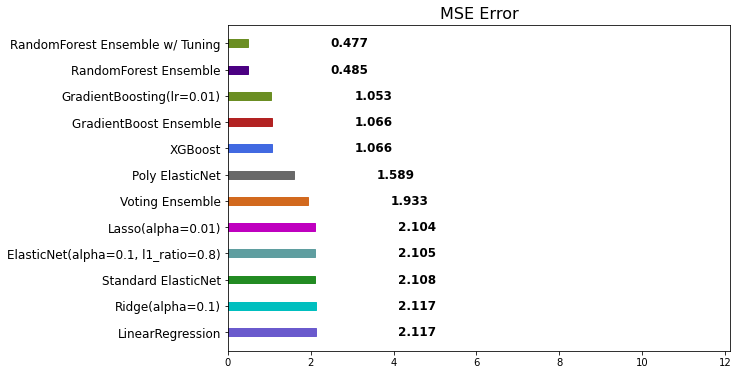

In [119]:
from xgboost import XGBRegressor, XGBClassifier

xgb = XGBRegressor(random_state=SEED)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
mse_eval('XGBoost', xgb_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

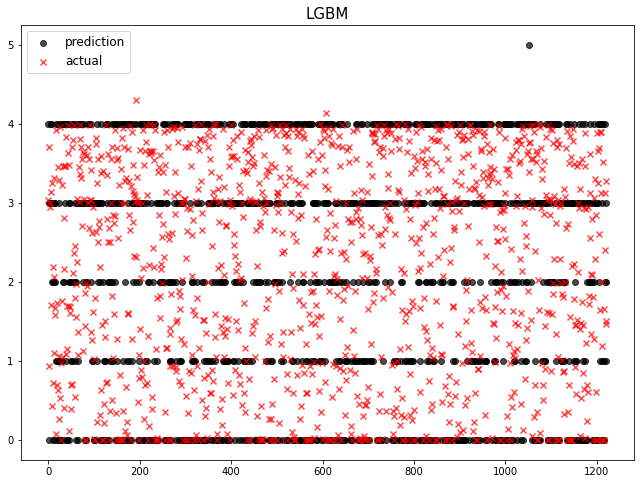

                                  model       mse
0                      LinearRegression  2.117299
1                      Ridge(alpha=0.1)  2.117259
2                   Standard ElasticNet  2.107776
3   ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                     Lasso(alpha=0.01)  2.104327
5                       Voting Ensemble  1.933001
6                       Poly ElasticNet  1.589153
7                               XGBoost  1.066186
8                GradientBoost Ensemble  1.065796
9             GradientBoosting(lr=0.01)  1.053063
10                                 LGBM  0.731748
11                RandomForest Ensemble  0.485249
12      RandomForest Ensemble w/ Tuning  0.476526


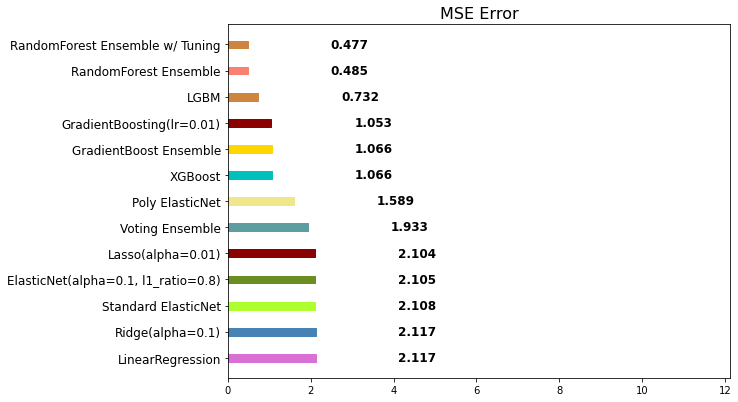

In [120]:
from lightgbm import LGBMRegressor, LGBMClassifier

lgbm = LGBMRegressor(random_state=SEED)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
mse_eval('LGBM', lgbm_pred, y_test)


Stacking   
개별 모델이 예측한 데이터를 기반으로 **final_estimator** 종합하여 예측을 수행합니다.

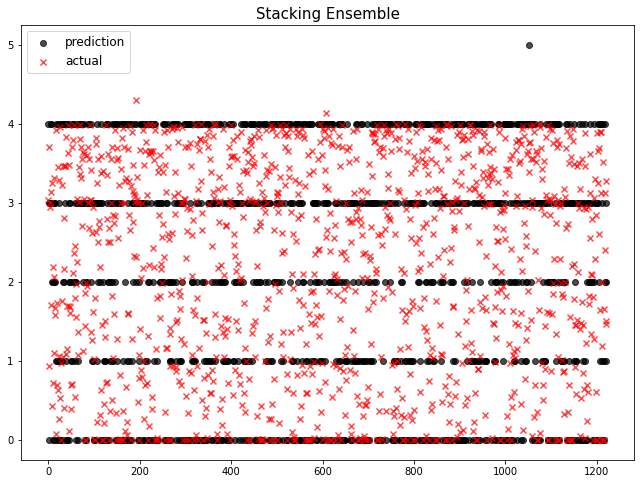

                                  model       mse
0                      LinearRegression  2.117299
1                      Ridge(alpha=0.1)  2.117259
2                   Standard ElasticNet  2.107776
3   ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                     Lasso(alpha=0.01)  2.104327
5                       Voting Ensemble  1.933001
6                       Poly ElasticNet  1.589153
7                               XGBoost  1.066186
8                GradientBoost Ensemble  1.065796
9             GradientBoosting(lr=0.01)  1.053063
10                                 LGBM  0.731748
11                    Stacking Ensemble  0.518396
12                RandomForest Ensemble  0.485249
13      RandomForest Ensemble w/ Tuning  0.476526


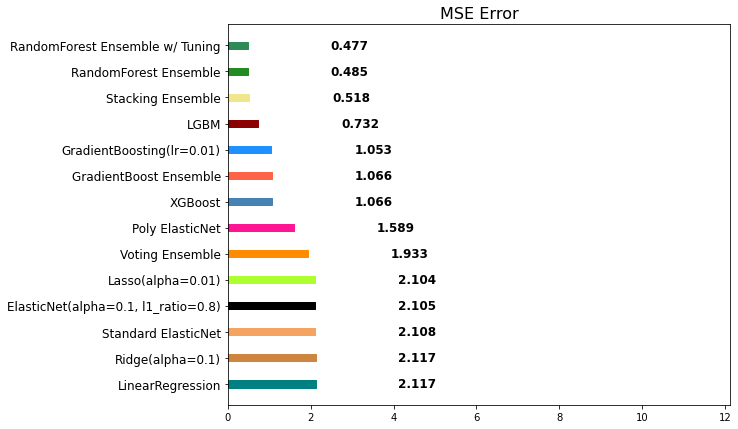

In [124]:
from sklearn.ensemble import StackingRegressor

stack_models = [
    ('elasticnet', poly_pipeline), 
    ('randomforest', rfr), 
    ('gbr', gbr),
    ('lgbm', lgbm),
]

stack_reg = StackingRegressor(stack_models, final_estimator=lgbm, n_jobs=-1)

stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

Weighted Blending  
각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
- 모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.
- **가중치의 합은 1.0**이 되도록 합니다.

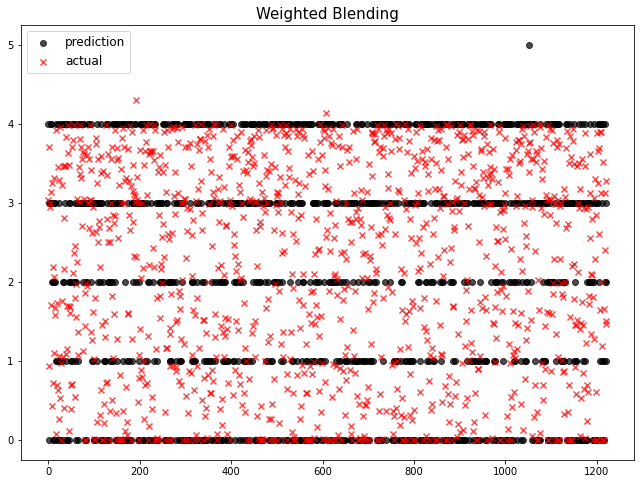

                                  model       mse
0                      LinearRegression  2.117299
1                      Ridge(alpha=0.1)  2.117259
2                   Standard ElasticNet  2.107776
3   ElasticNet(alpha=0.1, l1_ratio=0.8)  2.104590
4                     Lasso(alpha=0.01)  2.104327
5                       Voting Ensemble  1.933001
6                       Poly ElasticNet  1.589153
7                               XGBoost  1.066186
8                GradientBoost Ensemble  1.065796
9             GradientBoosting(lr=0.01)  1.053063
10                                 LGBM  0.731748
11                    Weighted Blending  0.565985
12                    Stacking Ensemble  0.518396
13                RandomForest Ensemble  0.485249
14      RandomForest Ensemble w/ Tuning  0.476526


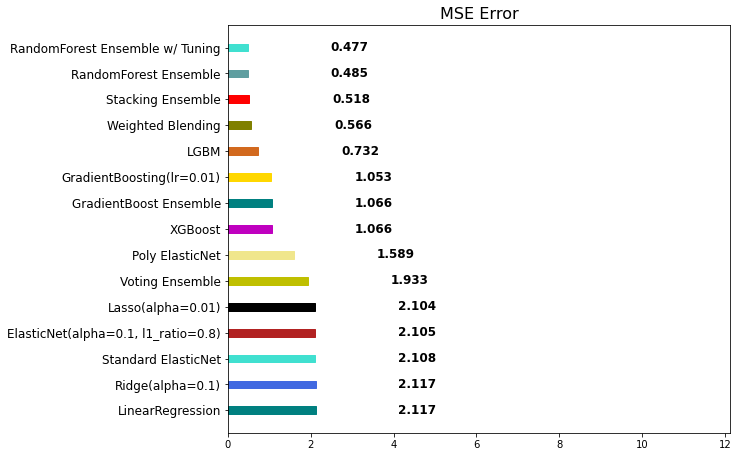

In [128]:
final_outputs = {
    'elasticnet': poly_pred, 
    'randomforest': rfr_pred, 
    'gbr': gbr_pred,
    'xgb': xgb_pred, 
    'lgbm': lgbm_pred,
    'stacking': stack_pred,
}

final_prediction=\
final_outputs['elasticnet'] * 0.1\
+final_outputs['randomforest'] * 0.5\
+final_outputs['gbr'] * 0.1\
+final_outputs['xgb'] * 0.1\
+final_outputs['lgbm'] * 0.1\
+final_outputs['stacking'] * 0.1\

mse_eval('Weighted Blending', final_prediction, y_test)

1. 앙상블은 대체적으로 단일 모델 대비 성능이 좋습니다.
2. 앙상블을 앙상블하는 기법인 Stacking과 Weighted Blending도 참고해 볼만 합니다.
3. 앙상블 모델은 적절한 **Hyperparameter 튜닝**이 중요합니다.
4. 앙상블 모델은 대체적으로 학습시간이 더 오래 걸립니다.
5. 따라서, 모델 튜닝을 하는 데에 걸리는 시간이 오래 소요됩니다.

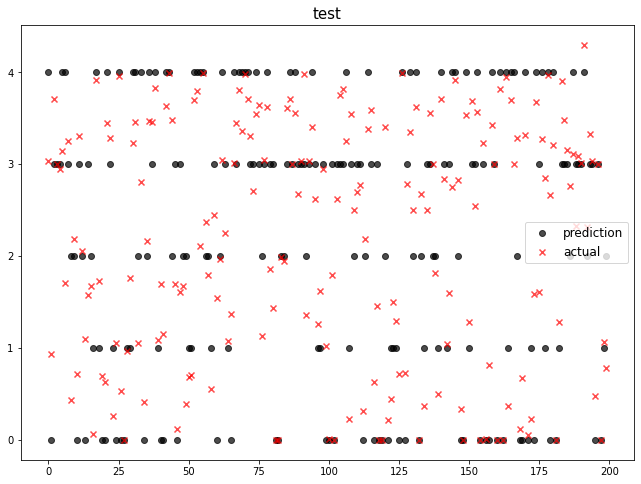

In [139]:
plot_predictions_partial_test('test', final_prediction, y_test, 0, 200)

# def comp_plot():

  

#   pyplot.step(
#     plt.figure(figsize=(11, 8))
#     index = np.arange(0,len(pred),1)

#     plt.scatter(index[start:end], y_test[start:end], alpha=0.7, marker='o', color='black')
#     plt.scatter(index[start:end], y_test_pred[start:end], alpha=0.7, marker='x', color='r')
#     plt.title(name_, fontsize=15)
#     plt.legend(['prediction', 'actual'], fontsize=12)
#     plt.show()